## ClearBrain -Scootfinity Data Science Challenge

<b>Question 1: Build a model that predicts conversion rate.</b><br>
Answer: Recommend to see the data exploration prior to model building. [Link](#Model) (Jupyter Cell: 26) for model building part.

<b>Question 2: Using the model, determine which features are important in predicting conversion. </b><br>
Answer: [Link](#Question_2) (Jupyter Cell: 40)

<b>Question 3: Come up with some recommendations of experiments you might run or changes you might make to the product team and to the marketing team</b>

<b>Marketing Team</b>
1. Age is an important feature apart from total page visits in predicting conversions. Younger users seem to use the service more than older users. Knowing the reason why this disparity exists would be useful in understanding user behaviour and improving product-market fit. Experiments to validate user characteristics such as user profession, location, or income can be used to find supporting factors for disparity in behaviour.
2. Conversion Rates in China are much lower than other countries. Germany has the highest conversion rate around 6.5% whereas China’s conversion rate is less than 0.5%. We can start by asking why campaigns used in China are not performing as good as they did in Germany assuming they are using the same campaigns. Factors such as cultural differences, language barriers could be influencing direct translation/intention of the campaign. We can come up with more targeted advertising campaigns and use A/B tests to know the most effective variations.
3. Old Users seem to have a higher conversion rate than New users. Knowing information like the number of times Old and New Users have seen an ad, the location, time of usage would be helpful in understanding their behaviour. Additionally, knowing if they received any offers or constant reminders from the app would be helpful data since we can then conduct A/B tests to see which method works the most in activating users accounts.

<b>Product Team</b>
1. Total pages visited seems to be the most important feature to predict conversion as users most interested in the service seem to want to know more about the service itself. The goal here would be to understand what information have they acquired by viewing 4 pages(mean) that they couldn’t get by viewing just 1 or 2 pages. Building better webpages that deliver the required information clearly and lead to conversion with least amount of views would help us in converting users who don’t have the patience to spend time to learn about the service. 

2. New users seem to have a lower conversion rate than Old users. This would need serious evaluation. Analysis of user flows within the app would let us know where users dropped-off and where they have had difficulty navigating. Knowing why new users couldn’t convert immediately is important. Specifically, we need to check what is stopping users from hailing their first scooter. Scenarios like limited types of payment options, waiting period, account verification could lead to delay in conversion and service abandonment. 

<b>Question 4: Statistical Significance - New vs Old Marketing Methodology</b>

We know that in the first group, the new marketing methodology is better than no intervention i.e. 99% statistically significant with incremental conversion rate 3.5% above holdout . 

We also know that in the second group the old marketing method is better than no intervention i.e. 99% statistically significant with incremental conversion rate 2.5% above holdout.

This does not tell us that new marketing methodology is better than the old marketing methodology. It only tells us that they are individually better when compared agains a holdout set.

Without conduction an experiment comparing the new methodology and old methodology we CANNOT tell that one is better than the other. If the data used to conduct the previous experiments is available, we might be able to use it to run a test assuming the controls conditions(such as duration, user groups, marketing variations, etc.) were same for both and match across the groups. 

Additionally, there has been no discussion about practical significance of these experiments. Even though an experiment may be statistically significant, the cost to develop and maintain the improvements may not be worth it. Therefore, we also need to take into account the practical significance levels for each of these experiments.

<b>Question 5: (Bonus) If you were going to run the scooter share service, how would you use this data / model in production to continuously improve the product?</b>

<b>Production Implementations Considerations:-</b>
If we want to constantly train the model, we would implement it as an Online Learning method where the model is constantly updated as new data arrives instead of an Offline learning method where we train the model only once on historical data.

If we want to make predictions in realtime, we would need to implement an On-demand mechanism where requests are sent to the model in the form of a REST calls instead of using Batch predictions where we make predictions in batches at particular intervals or until a specified numbers of prediction requests is reached. 

Based on the particular needs and priorities for the service, we would need to setup this the workflow, for example, using Azure Machine Learning and Spark Clusters etc. based on the company's technical stack and infrastructure. 

My recommendation from the above would be to go Batch predictions and an Online Learning method implementation since we don't really need real-time prediction and can deploy batch prediction every few hours saving costs and maintainance for a start-up. At the same time, an Online Learning method is important for the nature of Scootfinity's business where user behavioural data can change over short periods of time due to various real-world events.  

<b>Additional Improvements to the model:-</b>
1. Collect more data from the converted users to understand what made them use the service that can help us better target users for marketing and produce better product insights. For example: Users travelling to work on medium distance use the service more than long distance commute users. Get info like:-
    * Duration of Trip
    * Cost of Trip
    * Time of Trip
    * Location and Destination
    * Profession/Income Estimates
2. Collect more data about non-converted users to see why they did not convert within the app. Eg. They don’t understand the interface or they had different expectations/impression from the Ads/SEO they previously saw or There are restrictions in the app that don’t allow them to use the service instantly. Get info like 
    * Variants of Ads and SEO marketing used if any?
    * Intervals between different sessions?
    * What is the location within the country they tried using the app each time?
    * What time did they check the service?    
3. From all users
    * Number of times they saw an advertisement/SEO/direct
    * Number of time they opened app/service - time, loc, etc
    * User-flow within the app - Drop-off points
   

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 500)
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('conversion_data.csv')

In [3]:
data.head()

,country,age,new_user,source,total_pages_visited,converted
0,UK,25,1,Ads,1,0
1,US,23,1,Seo,5,0
2,US,28,1,Seo,4,0
3,China,39,1,Seo,5,0
4,US,30,1,Seo,6,0


# Dataset Description

In [4]:
data['converted'].value_counts()

0    306000
1     10200
Name: converted, dtype: int64

In [5]:
data['country'].value_counts()

US         178092
China       76602
UK          48450
Germany     13056
Name: country, dtype: int64

In [6]:
data['source'].value_counts()

Seo       155040
Ads        88740
Direct     72420
Name: source, dtype: int64

In [7]:
data['age'].describe()

count    316200.000000
mean         30.569858
std           8.271802
min          17.000000
25%          24.000000
50%          30.000000
75%          36.000000
max         123.000000
Name: age, dtype: float64

In [8]:
data['total_pages_visited'].describe()

count    316200.000000
mean          4.872966
std           3.341104
min           1.000000
25%           2.000000
50%           4.000000
75%           7.000000
max          29.000000
Name: total_pages_visited, dtype: float64

# Data Exploration

### Checking for Class Imblance

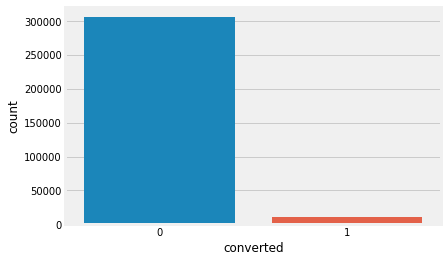

In [9]:
sns.countplot(x = data['converted'])

### Distribution of Age among Converted vs Non-Converted Users

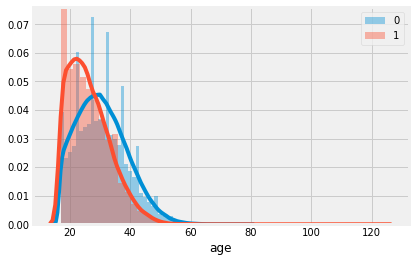

In [10]:
sns.distplot(data['age'][data['converted']==0])
sns.distplot(data['age'][data['converted']==1])
plt.legend(['0', '1'])


### Most Converted vs Non-Converted users across Countries

(0, 200000)

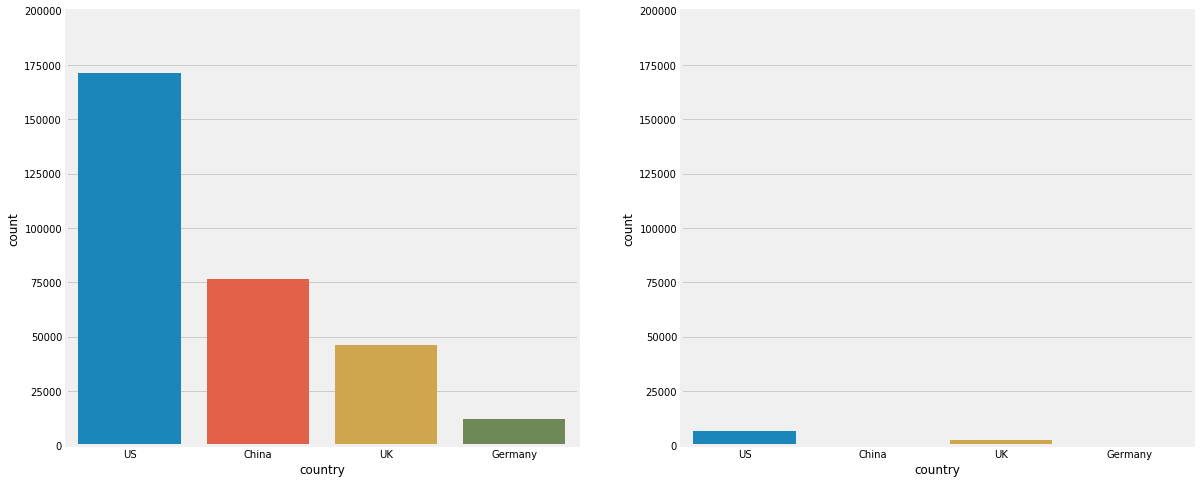

In [11]:
f, ax = plt.subplots(1,2,figsize =(18,8))
sns.countplot(x = data['country'][data['converted']==0], order = data['country'].value_counts().index,ax=ax[0])
sns.countplot(x = data['country'][data['converted']==1], order = data['country'].value_counts().index, ax=ax[1])
ax[0].set_ylim(0,200000)
ax[1].set_ylim(0,200000)

### Conversion Rates across Countries

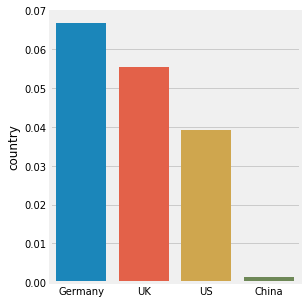

In [13]:
country_converts = data['country'][data['converted']==1].value_counts().to_frame()
country_nonconverts = data['country'][data['converted']==0].value_counts().to_frame()
conv_rate = country_converts/country_nonconverts
plt.figure(figsize = (4,5))
conv_rate = conv_rate.sort_values(by=['country'], ascending=False)
sns.barplot(x = conv_rate.index,y=conv_rate['country'])

### Most Converted vs Non-Converted users across Sources

(0, 10000)

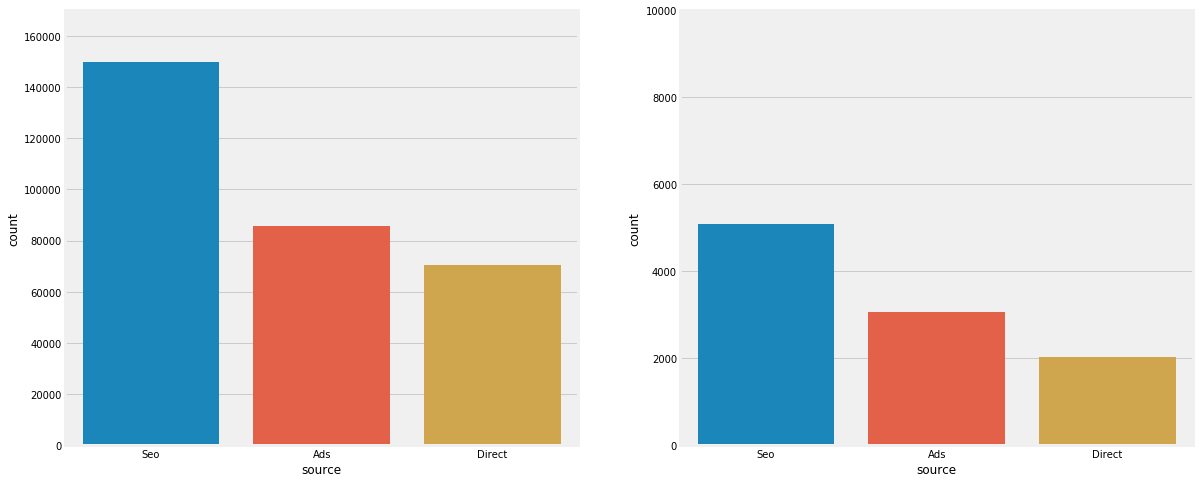

In [14]:
f, ax = plt.subplots(1,2,figsize =(18,8))
sns.countplot(x = data['source'][data['converted']==0], order = data['source'].value_counts().index,ax=ax[0])
sns.countplot(x = data['source'][data['converted']==1], order = data['source'].value_counts().index, ax=ax[1])
ax[0].set_ylim(0,170000)
ax[1].set_ylim(0,10000)

### Conversion Rates across Sources

(0.025, 0.04)

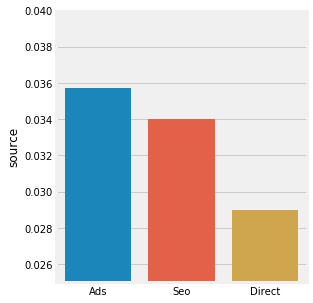

In [15]:
source_converts = data['source'][data['converted']==1].value_counts().to_frame()
source_nonconverts = data['source'][data['converted']==0].value_counts().to_frame()
conv_rate = source_converts/source_nonconverts
plt.figure(figsize = (4,5))
conv_rate = conv_rate.sort_values(by=['source'], ascending=False)
sns.barplot(x = conv_rate.index,y=conv_rate['source'])
plt.ylim(0.025, 0.040)

### Age and Conversion

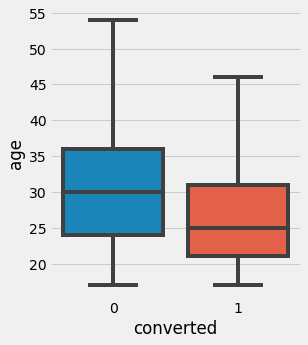

In [16]:
matplotlib.style.use('fivethirtyeight')
plt.figure(figsize = (4,5))
sns.boxplot(data = data, x = 'converted', y='age', showfliers=False)

### New-Users vs Old-Users Conversion Rates

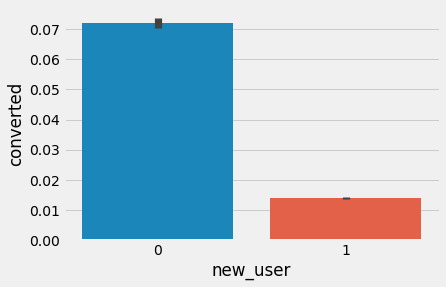

In [17]:
sns.barplot(x = data['new_user'], y=data['converted'])


### Each Source Conversion Rate in Each Country

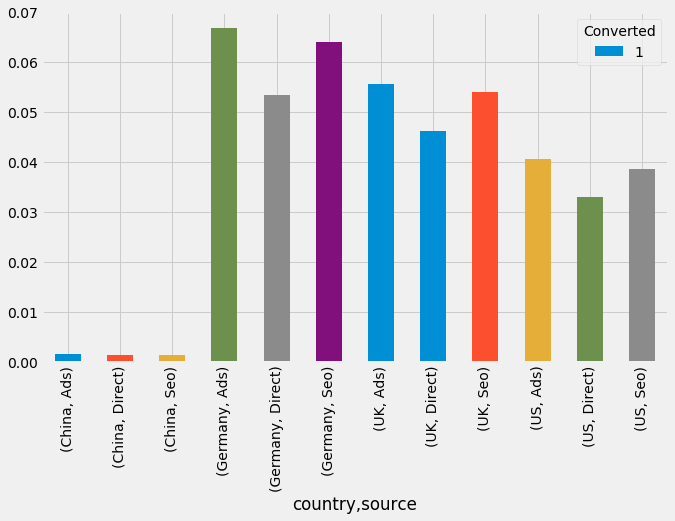

In [18]:
ct = pd.crosstab([data.country, data.source], data.converted,normalize='index')
plt.figure(figsize = (30,35))
ct[1].plot.bar()
plt.legend(title='Converted')
fig = matplotlib.pyplot.gcf()
fig.set_size_inches(10, 6)
plt.show()
# y-axis is Conversion rate

### Correlation Heatmap

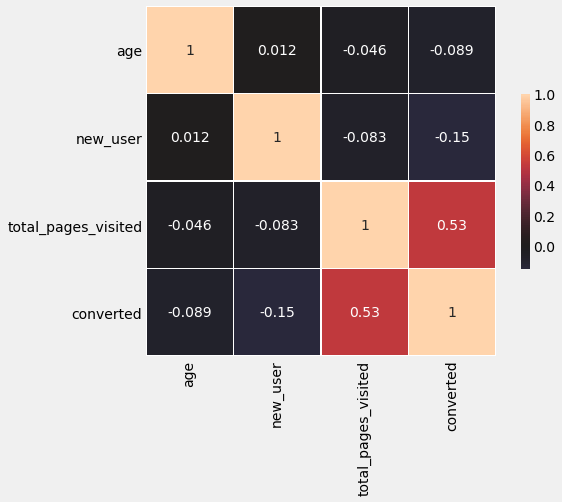

In [19]:
corr_data = data[['age','new_user','total_pages_visited','converted']]
corr = corr_data.corr()

f, ax = plt.subplots(figsize=(8, 6))

# Generate a mask for the upper triangle
#mask = np.zeros_like(corr, dtype=np.bool)
#mask[np.triu_indices_from(mask)] = True

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

sns.heatmap(corr, annot=True, center=0,square=True, linewidths=.5, cbar_kws={"shrink": .5})
#sns.heatmap(corr)
#pay_f.head()

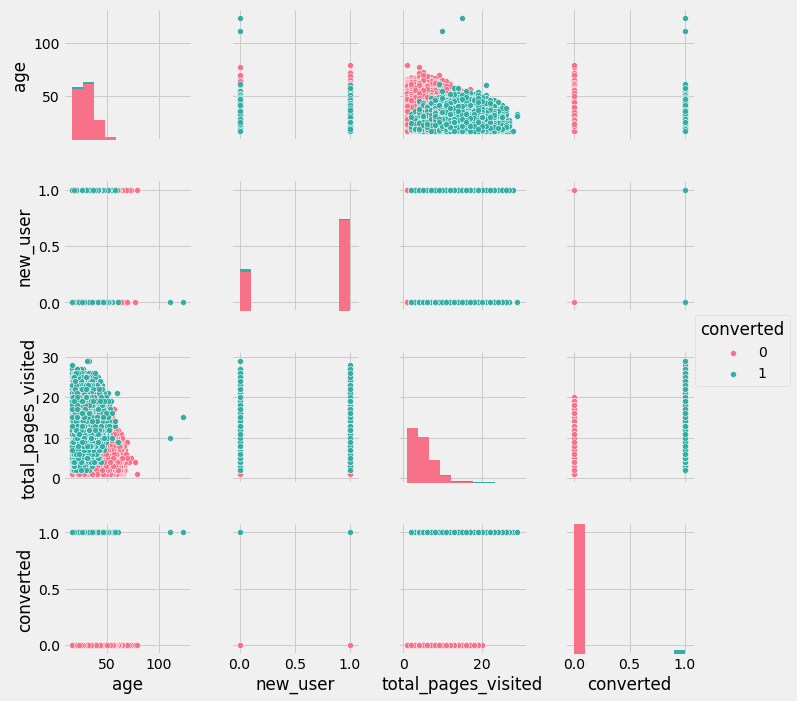

In [20]:
sns.pairplot(corr_data, palette="husl", hue='converted')

In [21]:
from scipy import stats
import numpy as np

z = np.abs(stats.zscore(data['age']))
print(z)

[0.67335589 0.91514157 0.31067738 ... 0.67335589 1.0360344  0.79424873]


In [22]:
threshold = 3
out = (np.where(z > 3))

In [23]:
len(out[0])

1156

# Data Preparation

In [24]:
#data = data.drop('ID', axis=1)
d1 = pd.get_dummies(data, columns = ['country', 'source'])
d1.head()

,age,new_user,total_pages_visited,converted,country_China,country_Germany,country_UK,country_US,source_Ads,source_Direct,source_Seo
0,25,1,1,0,0,0,1,0,1,0,0
1,23,1,5,0,0,0,0,1,0,0,1
2,28,1,4,0,0,0,0,1,0,0,1
3,39,1,5,0,1,0,0,0,0,0,1
4,30,1,6,0,0,0,0,1,0,0,1


In [25]:
X = d1.drop('converted', axis=1)
y = d1['converted']
print(X.shape)
print(y.shape)

(316200, 10)
(316200,)


# <a id='Model'> Machine Learning Model </a>

In [26]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn import metrics

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

## Evaluation Metric

We will use the recall score also known as sensitivity as an evaluation metric because for this particular problem, the business context of a Scootfinity makes clear it is more important to know who will convert rather than who will not. Converts generate revenue to Scootfinity much more than the non-converts. In other words, it is ok if we classify a few non-converts as potential converts rather than classifying actual converts as non-converts. Non-converts who get classified as converts (False Positives) would be users who are on the borderline of the model and have a higher chance of converting than the rest of non-converts. This will in turn help Scootfinity to have more targeted and effective marketing campaigns and product efforts that will help acquire more customers. 

We will predict users who we know will convert for sure. We will also include include in predictions a few users who are the most likely to convert. This will help in Scootfinity’s user activation and acquisition efforts.

We will try to increase the recall score throughout the processes in the notebook based on different algorithms, tuning procedures, and thresholding techniques.

### Logistic Regression

In [28]:
penalty_type = ['l1', 'l2']
C_value = [0.001,0.01,0.1,0.5,1]
scoring_metrics = ['accuracy']

logreg = LogisticRegression()
param_grid = dict(penalty=penalty_type, C=C_value)
grid = GridSearchCV(logreg, param_grid, cv=10, scoring='recall', n_jobs=-1)
grid.fit(X,y)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 0.5, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='recall', verbose=0)

In [29]:
grid.best_params_, grid.best_score_

({'C': 1, 'penalty': 'l1'}, 0.6884313725490196)

In [30]:
logreg.fit(X_train, y_train)
y_pred_proba_logreg = logreg.predict_proba(X_test)[:,1]


### Naive Bayes

In [31]:
%%time
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

scores = cross_val_score(nb, X, y, cv=10, scoring='recall')
print(scores)
print(scores.mean())

CPU times: user 6 µs, sys: 2 µs, total: 8 µs
Wall time: 15.5 µs
[0.83333333 0.84117647 0.82941176 0.85392157 0.84607843 0.82941176
 0.87254902 0.84117647 0.85392157 0.85490196]
0.8455882352941178


In [32]:
nb.fit(X_train, y_train)
y_pred_proba_nb = nb.predict_proba(X_test)[:,1]


### Random Forest

In [33]:
%%time

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

rfc = RandomForestClassifier()
scores = cross_val_score(rfc, X, y, cv=10, scoring='recall')
print(scores)
print(scores.mean())

CPU times: user 6 µs, sys: 3 µs, total: 9 µs
Wall time: 16.7 µs


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


[0.67745098 0.68333333 0.66666667 0.66372549 0.67156863 0.65098039
 0.70196078 0.68235294 0.67254902 0.68039216]
0.6750980392156863


In [34]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)>

In [35]:
rfc.fit(X_train, y_train)
y_pred_proba_rfc = rfc.predict_proba(X_test)[:,1]


### AdaBoost

In [36]:
%%time

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier()
scores = cross_val_score(ada, X, y, cv=10, scoring='recall',n_jobs = -1)
print(scores)
print(scores.mean())

CPU times: user 5 µs, sys: 2 µs, total: 7 µs
Wall time: 13.8 µs
[0.68627451 0.68431373 0.66176471 0.66568627 0.68823529 0.6745098
 0.69117647 0.68333333 0.67254902 0.69411765]
0.6801960784313726


In [37]:
ada.fit(X_train, y_train)
y_pred_proba_ada = ada.predict_proba(X_test)[:,1]


### Gradient Boosting

In [38]:
%%time

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

gbc = GradientBoostingClassifier()
scores = cross_val_score(gbc, X, y, cv=10, scoring='recall', n_jobs = -1)
print(scores)
print(scores.mean())

CPU times: user 2 µs, sys: 1 µs, total: 3 µs
Wall time: 5.48 µs
[0.70294118 0.6745098  0.67941176 0.67352941 0.70098039 0.67745098
 0.69705882 0.6872549  0.67647059 0.7       ]
0.6869607843137255


In [39]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]

### <a id='Question_2'> Feature Importance</a>

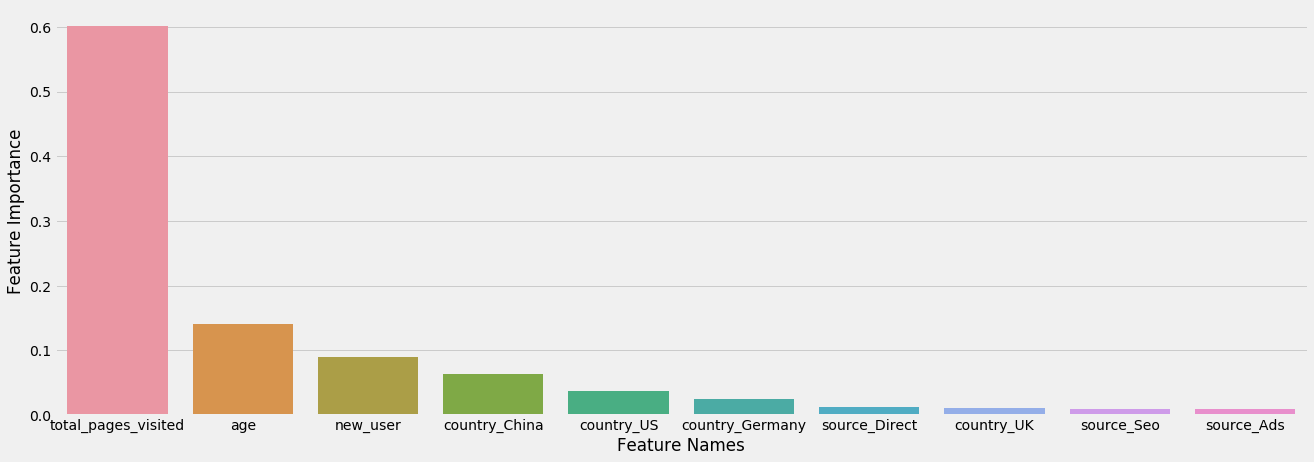

In [40]:
plt.subplots(figsize=(20,7))

feature_importance = gbc.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
d = {'Feature Names': X.columns, 'Feature Importance' : gbc.feature_importances_}
fid = pd.DataFrame(data = d)
fid = fid.sort_values(by=['Feature Importance'], ascending=False)
sns.barplot(x = fid['Feature Names'], y = fid['Feature Importance'])


## ROC Curve

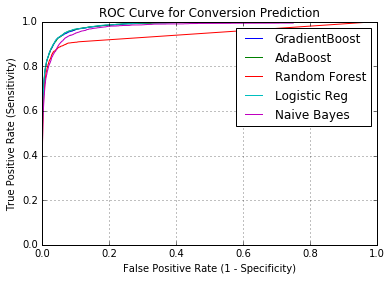

In [41]:
#import matplotlib
plt.subplots(figsize=(40,22))
matplotlib.style.use('classic')
#f, ax = plt.subplots(1,2,figsize =(18,8))
%matplotlib inline
plt.xlim(0,1)
plt.ylim(0,1)
#fig = plt.gcf()
#fig.set_size_inches(8,7)
plt.title("ROC Curve for Conversion Prediction")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.grid(True)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_gbc)
plt.plot(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_ada)
plt.plot(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_rfc)
plt.plot(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_logreg)
plt.plot(fpr, tpr)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_nb)
plt.plot(fpr, tpr)
plt.legend(['GradientBoost','AdaBoost','Random Forest','Logistic Reg','Naive Bayes'])


In [42]:
print("AUC of Gradient Boosting Algorithm: ", metrics.roc_auc_score(y_test,y_pred_proba_gbc))
print("AUC of AdaBoost Algorithm: ", metrics.roc_auc_score(y_test,y_pred_proba_ada))
print("AUC of Random Forest Algorithm: ", metrics.roc_auc_score(y_test,y_pred_proba_rfc))
print("AUC of Logistic Regression Algorithm: ", metrics.roc_auc_score(y_test,y_pred_proba_logreg))
print("AUC of Naive Bayes Algorithm: ", metrics.roc_auc_score(y_test,y_pred_proba_nb))

AUC of Gradient Boosting Algorithm:  0.9847344449939557
AUC of AdaBoost Algorithm:  0.9850530631692929
AUC of Random Forest Algorithm:  0.9435159554838259
AUC of Logistic Regression Algorithm:  0.9856516059530204
AUC of Naive Bayes Algorithm:  0.9767978816375265


## Adjusting Model Threshold

In this step, we will try to adjust the threshold of the gradient boosting classifier in such a way that it can increase the sensitivity of the model without adversely affecting the accuracy or the specificity values.


In [44]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
y_pred = gbc.predict(X_test)
print(metrics.recall_score(y_test, y_pred))
print(metrics.accuracy_score(y_test,y_pred))

#gbc.predict_proba(X_test)

0.6940443752432853
0.9859203036053131


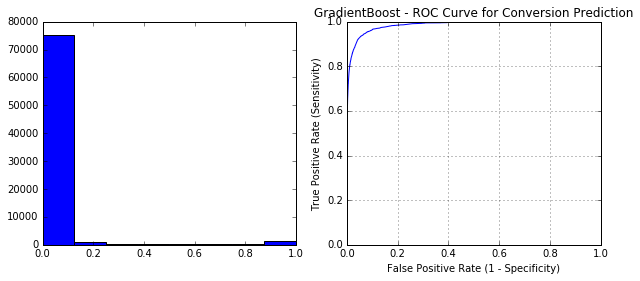

In [45]:
y_pred_proba = gbc.predict_proba(X_test)[:,1]

import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(1, 2,  figsize=(10,4))
#f1 = plt.figure(1)
ax[0].hist(y_pred_proba, bins = 8)
plt.xlim(0,1)
#f1.show()

#f2 = plt.figure(2)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_gbc)
plt.title("GradientBoost - ROC Curve for Conversion Prediction")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)
ax[1].plot(fpr, tpr)
plt.show()

In the first graph on the left, we notice that most of the conversions happen before 0.2 probability. By default, the Gradient Boosting Classifier has the threshold at 0.50. We can increase the sensitivity of the classifier by reducing the threshold and bringing it to the left. 

Now, the more we bring it to the left, the higher the specificity value decreases, or we need to find an acceptable tradeoff. 

On the graph right side, we can see the amount of specificity we can expect for a certain level of specificity. There is a handy function below called evaluate_threshold that calculates the tradeoff values.

In [46]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_proba], 0.075)[0]
#y_pred_class
print('Null Value Accuracy: ', 1 - data['converted'].mean())
print('Accuracy Score: ', metrics.accuracy_score(y_test,y_pred_class))
print('Sensitivity Score: ', metrics.recall_score(y_test, y_pred_class))

Null Value Accuracy:  0.967741935483871
Accuracy Score:  0.9680202403542062
Sensitivity Score:  0.8812767613857532


## Tuning Gradient Boosting

I will not be using a wide ranges/set of parameters since that would take a lot more run time beyond the allowed limit of this challenge. Therefore, I will be using only a small set of values with the goal to show the steps in the tuning process leading to the final model.

In [47]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)

### Base Model

Running a baseline model with default parameter values.

In [48]:
from sklearn.model_selection import cross_val_score
#Baseline values from documentation for reference
#gbc = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, min_samples_split = 150, min_samples_leaf = 1, max_depth=5, max_features='sqrt', subsample=0.8)
gbc = GradientBoostingClassifier()
scores = cross_val_score(gbc, X, y, cv=10, scoring='recall')
print(scores)
print(scores.mean())

[0.70294118 0.6745098  0.67941176 0.67352941 0.70098039 0.67745098
 0.69705882 0.6872549  0.67647059 0.7       ]
0.6869607843137255


## Tuning Order in terms of Maximum Impact
We go from parameters that have higher impact on improving our evaluation metric score to lower impact parameters. 
1. Number of Estimators
2. max_depth and num_samples-split
3. min_samples leaf
4. max_features
5. Tuning subsample value
6. Lowering Learning Rate and Re-Tuning Estimators
7. Halving Learning Rate and 2x Increasing Estimators

### Tuning Number of Estimators

In [49]:
from sklearn.model_selection import GridSearchCV
n_estimator_range = range(240, 350, 10)
param_grid = dict(n_estimators = n_estimator_range)
grid =GridSearchCV(gbc,param_grid, cv=10, scoring='recall', n_jobs=-1)

In [51]:
%%time
grid.fit(X,y)
grid.grid_scores_

CPU times: user 45.3 s, sys: 2.08 s, total: 47.4 s
Wall time: 5min 20s


/home/ec2-user/anaconda3/envs/python3/lib/python3.6/site-packages/sklearn/model_selection/_search.py:761: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


In [53]:
grid.best_params_ 

{'n_estimators': 330}

In [54]:
grid.best_score_

0.6891176470588235

### Tuning max_depth and num_samples_split

In [58]:
md_range = [5,7]
msp_range = [150,200]
param_grid = dict(max_depth = md_range, min_samples_split = msp_range)
grid = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=330, max_features='sqrt', subsample=0.8, random_state=4), param_grid = param_grid, scoring='recall', n_jobs=-1, cv = 10)
grid.fit(X,y)
grid.best_params_, grid.best_score_


({'max_depth': 5, 'min_samples_split': 150}, 0.6866666666666666)

In [ ]:
from sklearn.grid_search import RandomizedSearchCV
md_range = range(1, 11, 1)
msp_range = range(50,101, 50)
param_grid = dict(max_depth = md_range, min_samples_split = msp_range)
grid = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=260, max_features='sqrt', subsample=0.8, random_state=4), param_grid = param_grid, scoring='recall', n_jobs=-1, cv = 10)
grid.fit(X,y)
grid.grid_scores_, grid.best_params_, grid.best_score_

### Tuning min_samples_leaf

In [60]:
from sklearn.grid_search import RandomizedSearchCV
msl_range = range(1, 5, 1)
param_grid = dict(min_samples_leaf = msl_range)
grid = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=330, max_features='sqrt', subsample=0.8, random_state=4, max_depth = 5, min_samples_split = 150), param_grid = param_grid, scoring='recall', n_jobs=-1, cv = 10)
grid.fit(X,y)
grid.best_params_, grid.best_score_

({'min_samples_leaf': 3}, 0.6873529411764706)

### Tuning max_features

In [ ]:
#Not Testing on a large set of hyperparameters due to time.
'''
mf_range = []
mf_range.extend(range(1, 20, 2))
mf_range.extend(['sqrt', None])
param_grid = dict(max_features = mf_range)
param_grid
'''

In [63]:
from sklearn.grid_search import RandomizedSearchCV
mf_range = []
#mf_range.extend(range(1, 20, 2))
mf_range.extend(['sqrt', None])
#mf_range
param_grid = dict(max_features = mf_range)
grid = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=330, subsample=0.8, random_state=4, max_depth = 5, min_samples_split = 150, min_samples_leaf = 3), param_grid = param_grid, scoring='recall', n_jobs=-1, cv = 10)
grid.fit(X,y)
grid.best_params_, grid.best_score_

({'max_features': 'sqrt'}, 0.6873529411764706)

### Lower Subsample

In [65]:
from sklearn.grid_search import RandomizedSearchCV
lss_range = [0.6,0.8,0.9]
param_grid = dict(subsample = lss_range)
grid = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.1, n_estimators=330, random_state=4, max_depth = 5, min_samples_split = 150, min_samples_leaf = 3, max_features = 'sqrt'), param_grid = param_grid, scoring='recall', n_jobs=-1, cv = 10)
grid.fit(X,y)
grid.best_params_, grid.best_score_


({'subsample': 0.9}, 0.6890196078431372)

### Re-Tuning Learning Rate and Number of Estimators

<b>Learning Rate / 2 <br>
Number of Estimators * 2
</b>

In [67]:
from sklearn.grid_search import RandomizedSearchCV
lr_range = [0.05]
param_grid = dict(learning_rate = lr_range)
grid = GridSearchCV(estimator = GradientBoostingClassifier(subsample = 0.9, n_estimators=660, random_state=4, max_depth = 5, min_samples_split = 150, min_samples_leaf = 3, max_features = 'sqrt'), param_grid = param_grid, scoring='recall', n_jobs=-1, cv = 10)
grid.fit(X,y)
grid.best_params_, grid.best_score_

({'learning_rate': 0.05}, 0.6881372549019608)

<b> Learning Rate / 20 <br>
Number of Estimators * 10</b>

In [ ]:
#Not running this due to time.

'''
from sklearn.grid_search import RandomizedSearchCV
lr_range = [0.025]
param_grid = dict(learning_rate = lr_range)
grid = GridSearchCV(estimator = GradientBoostingClassifier(subsample = 0.9, n_estimators=3300, random_state=4, max_depth = 5, min_samples_split = 150, min_samples_leaf = 3, max_features = 'sqrt'), param_grid = param_grid, scoring='recall', n_jobs=-1, cv = 10)
grid.fit(X,y)
grid.best_params_, grid.best_score_
'''


## Final Model Parameters

learning_rate = 0.1 <br>
subsample = 0.9 <br>
n_estimators = 330 <br>
max_depth = 4 <br>
min_samples_split = 150 <br>
min_samples_leaf = 3 <br>
max_features = 'sqrt' <br>

In [ ]:
from sklearn.model_selection import cross_val_score
gbc = GradientBoostingClassifier(learning_rate = 0.1, subsample = 0.9, n_estimators=330, random_state=4, max_depth = 4, min_samples_split = 150, min_samples_leaf = 3, max_features = 'sqrt')
print('Recall Value', cross_val_score(gbc, X,y,cv=10,scoring='recall').mean())
print('AUC', cross_val_score(gbc, X,y,cv=10,scoring='roc_auc').mean())


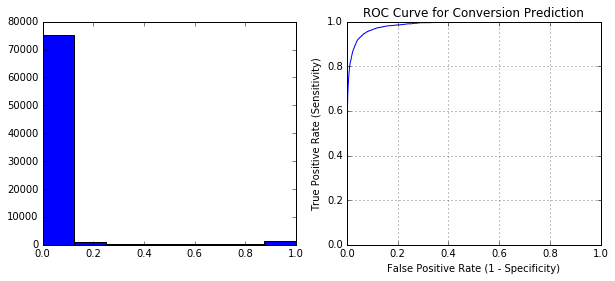

In [71]:
gbc = GradientBoostingClassifier(learning_rate = 0.1, subsample = 0.9, n_estimators=330, random_state=4, max_depth = 4, min_samples_split = 150, min_samples_leaf = 3, max_features = 'sqrt')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 4)
gbc.fit(X_train, y_train)
y_pred_proba_gbc = gbc.predict_proba(X_test)[:,1]

import matplotlib.pyplot as plt
%matplotlib inline

f, ax = plt.subplots(1, 2,  figsize=(10,4))
#f1 = plt.figure(1)
ax[0].hist(y_pred_proba, bins = 8)
plt.xlim(0,1)
#f1.show()

#f2 = plt.figure(2)
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_gbc)
plt.title("ROC Curve for Conversion Prediction")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.xlim(0,1)
plt.ylim(0,1)
plt.grid(True)
ax[1].plot(fpr, tpr)
plt.show()

In [85]:
from sklearn.preprocessing import binarize
y_pred_class = binarize([y_pred_proba], 0.075)[0]
#y_pred_class
print('Null Value Accuracy: ', 1 - data['converted'].mean())
print('Accuracy Score: ', metrics.accuracy_score(y_test,y_pred_class))
print('Sensitivity Score: ', metrics.recall_score(y_test, y_pred_class))

Null Value Accuracy:  0.967741935483871
Accuracy Score:  0.9680202403542062
Sensitivity Score:  0.8812767613857532


In [86]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_proba_gbc)
# A function that accepts a threshold and prints sensitivity and specificity
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [89]:
evaluate_threshold(0.07)

Sensitivity: 0.8991825613079019
Specificity: 0.9653247211725788


In [88]:
print(metrics.roc_auc_score(y_test,y_pred_proba_gbc))

0.9852879983945821


## <b>Final Results - Recall Scores </b>

|  _Recall Scores_ | Baseline | Tuned Model | 
| ------------- | ------------- | ------------- |
| **Without Threshold** | 0.6869  | 0.6881 |
| **With Threshold** | 0.8812  |0.8812  |
| **Overall Difference** | 0.1943  | 0.194 |